Main Modules for this project are: 


*   Pandas : crucial for data processing
*   Matplotlib / seaborn : data visualization
*   nltk : Used for natural langage processing
*   Textblob: supports complex analysis and operations on textual data.
*   Shuffle: Split data randomly for training and performance testing.
*   Tashaphyne: For word'stemming or removing preffix and suffix from a unit.







In [1]:
pip install tashaphyne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 251 kB 7.4 MB/s 
     |████████████████████████████████| 126 kB 46.1 MB/s 


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.utils import shuffle
from textblob import TextBlob
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer
import tashaphyne.arabic_const as arabconst 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stops = set(stopwords.words("arabic"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


First i prepared the path environement on my drive/Arabic Fake news dection.


Dataset = AFND (arabic fake news dataset).


This dataset contains 134 sources and each source contain more than 2000 articles. 

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']= "/content/drive/MyDrive/kaggle"
%cd "/content/drive/MyDrive/Arabic Fake news detection"
import json 
!kaggle datasets download -d murtadhayaseen/arabic-fake-news-dataset-afnd

Since we are working with multiple sources ,let's explore and see the **first source** and then concat all the sources to train our model.

In [4]:
import json
f1 = open('/content/drive/MyDrive/Arabic Fake news detection/AFND/Dataset/source_1/scraped_articles.json')
data_source_1 = json.load(f1)

In [5]:
  # Iterating through the json
# list
for article in data_source_1['articles']:
    print(article)
# Closing file
f1.close()

{'title': 'المنتخب الوطني المغربي لأقل من 20 سنة يخوض تجمعا اعداديا بالمعمورة', 'text': 'يخوض المنتخب الوطني المغربي لكرة القدم لأقل من 20 سنة، ما بين 24 و28 ماي الجاري تجمعا إعداديا مغلقا بمركب محمد السادس لكرة القدم بالمعمورة.\n\nوذكر بلاغ للجامعة الملكية المغربية لكرة القدم، أن هذا التجمع الاعدادي يدخل في إطار استعدادات النخبة الوطنية للمشاركة في البطولة العربية التي ستحتضنها مصر في الفترة المتراوحة ما بين 19 يونيو و3 يوليوز 2021.\n\nولهذا الغرض، وجه السيد فتحي جمال، المشرف العام على المنتخب الوطني الدعوة إلى 24 لاعبا ويتعلق الأمر بكل من :\n\n1- عبد الله بنتيك ......... أكاديمية محمد السادس\n\n2- اسماعيل لغزالي ..... أكاديمية محمد السادس\n\n3- أنس نناح ............... أكاديمية محمد السادس\n\n4- محمد أمين السهل .. أكاديمية محمد السادس\n\n5- حسن أكبوب ........... أكاديمية محمد السادس\n\n6- عمر صادق .............. أكاديمية محمد السادس\n\n7- عثمان شرايبي ........ أكاديمية محمد السادس\n\n8- محمد راديد ............. أكاديمية محمد السادس\n\n9- بدر أوهامي ............. النسمة السطاتية\n\n10

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Converting the json articles frome source 1 to dataframes :

In [6]:
df_source_1 = pd.json_normalize(data_source_1, record_path =['articles'])
df_source_1.head()

,title,text,published date
0,المنتخب الوطني المغربي لأقل من 20 سنة يخوض تجم...,يخوض المنتخب الوطني المغربي لكرة القدم لأقل من...,2021-05-23T00:00:00
1,وزير النقل اعمارة:السرعة عامل مسبب لحوادث السي...,ترأس عبد القادر اعمارة، وزير التجهيز و النقل و...,2021-05-22T00:00:00
2,"ميسي يؤكد أن الفوز بكأس اسبانيا كان ""نقطة تحول""",أكد النجم الارجنتيني ليونيل ميسي أن فوز فريقه ...,2021-05-22T00:00:00
3,دبلوماسي مغربي سابق بإسبانيا لـ2M.ma: خطأ مدري...,أكّد الدبلوماسي المغربي السابق بإسبانيا، عبد ا...,2021-05-22T00:00:00
4,شركتان، فرنسية وبريطانية تعلنان عن نتائج إيجاب...,أعلنت شركتا سانوفي الفرنسية العملاقة في تصنيع ...,2021-05-17T00:00:00


This is a usefull for giving labels to the articles ( Credible or not credible)
Since our objectif is to classify a given news as fake or not we are in a supervised machine learning project so we highly need data to be labled.


In [7]:
json_sources_Annotation= open("/content/drive/MyDrive/Arabic Fake news detection/AFND/sources.json")
sources_Annotation=json.load(json_sources_Annotation)
sources_Annotation=pd.json_normalize(sources_Annotation)
json_sources_Annotation.close()

In [8]:
sources_Annotation.head()

,source_1,source_2,source_3,source_4,source_5,source_6,source_7,source_8,source_9,source_10,...,source_125,source_126,source_127,source_128,source_129,source_130,source_131,source_132,source_133,source_134
0,credible,undecided,credible,credible,undecided,credible,not credible,not credible,not credible,not credible,...,not credible,credible,credible,not credible,credible,not credible,credible,not credible,credible,credible


In [9]:
df_source_1["Label"]=sources_Annotation['source_1'].to_string()

In [10]:
df_source_1['Label'] = df_source_1['Label'].map(lambda x: x.lstrip('0'))

In [11]:
df_source_1

,title,text,published date,Label
0,المنتخب الوطني المغربي لأقل من 20 سنة يخوض تجم...,يخوض المنتخب الوطني المغربي لكرة القدم لأقل من...,2021-05-23T00:00:00,credible
1,وزير النقل اعمارة:السرعة عامل مسبب لحوادث السي...,ترأس عبد القادر اعمارة، وزير التجهيز و النقل و...,2021-05-22T00:00:00,credible
2,"ميسي يؤكد أن الفوز بكأس اسبانيا كان ""نقطة تحول""",أكد النجم الارجنتيني ليونيل ميسي أن فوز فريقه ...,2021-05-22T00:00:00,credible
3,دبلوماسي مغربي سابق بإسبانيا لـ2M.ma: خطأ مدري...,أكّد الدبلوماسي المغربي السابق بإسبانيا، عبد ا...,2021-05-22T00:00:00,credible
4,شركتان، فرنسية وبريطانية تعلنان عن نتائج إيجاب...,أعلنت شركتا سانوفي الفرنسية العملاقة في تصنيع ...,2021-05-17T00:00:00,credible
...,...,...,...,...
2283,وفاة والد خبير التغذية نبيل العياشي بعد صراع م...,انتقل إلى دار البقاء والد خبير التغذية نبيل ال...,2021-06-30T00:00:00,credible
2284,كوفيد 19 .. وزارة الصحة تدعو المواطنين إلى الا...,دعت وزارة الصحة، اليوم الأربعاء، مجددا، المواط...,2021-06-30T00:00:00,credible
2285,البيضاء: حريق بإحدى مستودعات التخزين يدفع السل...,اندلع، صباح اليوم الأربعاء، حريق بإحدى المستود...,2021-06-30T00:00:00,credible
2286,"كأس أوروبا: مولر ""متألم للغاية"" من إضاعته فرصة...",تابع مهاجم منتخب ألمانيا توماس مولر صيامه في ن...,2021-06-30T00:00:00,credible


**Until Now , everything seems smooth. :D**

So our second setup is to merge sources to make more articles with their corresponding labels.

Since we are dealing with big data articles , i am gonna set a concat function that accumulates the articles depanding on the number of source in the parameter.

In [12]:
def concat_articles_from_sources(n,m):
  data_articles=pd.DataFrame()
  for i in range(n,m+1):
          file_path="/content/drive/MyDrive/Arabic Fake news detection/AFND/Dataset/source_"+str(i)+"/scraped_articles.json"
          file=open(file_path)
          df_source_i = json.load(file)
          df_source_i = pd.json_normalize(df_source_i, record_path =['articles'])
          df_source_i["Label"]=sources_Annotation.iloc[0,i-1]
          data_articles=pd.concat([data_articles,df_source_i])
          file.close()
  return data_articles


For example, I want to concatenate the articles from the first eight sources. 
As you can see the last class ( 5th class is undecided which is verified with the source annotation.

In [22]:
df=concat_articles_from_sources(1,5)
df

,title,text,published date,Label
0,المنتخب الوطني المغربي لأقل من 20 سنة يخوض تجم...,يخوض المنتخب الوطني المغربي لكرة القدم لأقل من...,2021-05-23T00:00:00,credible
1,وزير النقل اعمارة:السرعة عامل مسبب لحوادث السي...,ترأس عبد القادر اعمارة، وزير التجهيز و النقل و...,2021-05-22T00:00:00,credible
2,"ميسي يؤكد أن الفوز بكأس اسبانيا كان ""نقطة تحول""",أكد النجم الارجنتيني ليونيل ميسي أن فوز فريقه ...,2021-05-22T00:00:00,credible
3,دبلوماسي مغربي سابق بإسبانيا لـ2M.ma: خطأ مدري...,أكّد الدبلوماسي المغربي السابق بإسبانيا، عبد ا...,2021-05-22T00:00:00,credible
4,شركتان، فرنسية وبريطانية تعلنان عن نتائج إيجاب...,أعلنت شركتا سانوفي الفرنسية العملاقة في تصنيع ...,2021-05-17T00:00:00,credible
...,...,...,...,...
6839,العلاج بلسعات النحل في الجيزة,- 30/06/2021 . 22:56\n\nالعلاج بالنحل\n\nمن ال...,2021-06-30T00:00:00,undecided
6840,خلية الإعلام الأمني: 15 جريحاً حصيلة تفجير مدي...,صورة لانفجار مدينة الصدر في بغداد\n\n- 01/07/2...,2021-06-30T00:00:00,undecided
6841,بعد عام على إقرار قانون الأمن القومي.. هكذا تغ...,اعتقالات جماعية وتضييق على الإعلام.. عام على إ...,2021-06-30T00:00:00,undecided
6842,الحكم بالسجن 12 عاما على مساعدي سفاح أوروبا مي...,الحكم بالسجن 12 عاما على مساعدي سفاح أوروبا مي...,2021-06-30T00:00:00,undecided


**Hold on to your seats** , the work has just begun.

We will now clean up the textual data ( prepare it for the NLP process). 

Let's begin exploring our columns.
The published date can be splitted into two columns (date and time) and maybe the date column is "maybe" relevant to classify news as fake or real.


In [23]:
df['date'], df['Time'] = df['published date'].str.split('T', 1).str
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,title,text,published date,Label,date,Time
0,المنتخب الوطني المغربي لأقل من 20 سنة يخوض تجم...,يخوض المنتخب الوطني المغربي لكرة القدم لأقل من...,2021-05-23T00:00:00,credible,2021-05-23,00:00:00
1,وزير النقل اعمارة:السرعة عامل مسبب لحوادث السي...,ترأس عبد القادر اعمارة، وزير التجهيز و النقل و...,2021-05-22T00:00:00,credible,2021-05-22,00:00:00
2,"ميسي يؤكد أن الفوز بكأس اسبانيا كان ""نقطة تحول""",أكد النجم الارجنتيني ليونيل ميسي أن فوز فريقه ...,2021-05-22T00:00:00,credible,2021-05-22,00:00:00
3,دبلوماسي مغربي سابق بإسبانيا لـ2M.ma: خطأ مدري...,أكّد الدبلوماسي المغربي السابق بإسبانيا، عبد ا...,2021-05-22T00:00:00,credible,2021-05-22,00:00:00
4,شركتان، فرنسية وبريطانية تعلنان عن نتائج إيجاب...,أعلنت شركتا سانوفي الفرنسية العملاقة في تصنيع ...,2021-05-17T00:00:00,credible,2021-05-17,00:00:00
...,...,...,...,...,...,...
6839,العلاج بلسعات النحل في الجيزة,- 30/06/2021 . 22:56\n\nالعلاج بالنحل\n\nمن ال...,2021-06-30T00:00:00,undecided,2021-06-30,00:00:00
6840,خلية الإعلام الأمني: 15 جريحاً حصيلة تفجير مدي...,صورة لانفجار مدينة الصدر في بغداد\n\n- 01/07/2...,2021-06-30T00:00:00,undecided,2021-06-30,00:00:00
6841,بعد عام على إقرار قانون الأمن القومي.. هكذا تغ...,اعتقالات جماعية وتضييق على الإعلام.. عام على إ...,2021-06-30T00:00:00,undecided,2021-06-30,00:00:00
6842,الحكم بالسجن 12 عاما على مساعدي سفاح أوروبا مي...,الحكم بالسجن 12 عاما على مساعدي سفاح أوروبا مي...,2021-06-30T00:00:00,undecided,2021-06-30,00:00:00


Let's remove useless columns

In [24]:
df.drop(['published date','Time'], axis=1,inplace=True)
df


,title,text,Label,date
0,المنتخب الوطني المغربي لأقل من 20 سنة يخوض تجم...,يخوض المنتخب الوطني المغربي لكرة القدم لأقل من...,credible,2021-05-23
1,وزير النقل اعمارة:السرعة عامل مسبب لحوادث السي...,ترأس عبد القادر اعمارة، وزير التجهيز و النقل و...,credible,2021-05-22
2,"ميسي يؤكد أن الفوز بكأس اسبانيا كان ""نقطة تحول""",أكد النجم الارجنتيني ليونيل ميسي أن فوز فريقه ...,credible,2021-05-22
3,دبلوماسي مغربي سابق بإسبانيا لـ2M.ma: خطأ مدري...,أكّد الدبلوماسي المغربي السابق بإسبانيا، عبد ا...,credible,2021-05-22
4,شركتان، فرنسية وبريطانية تعلنان عن نتائج إيجاب...,أعلنت شركتا سانوفي الفرنسية العملاقة في تصنيع ...,credible,2021-05-17
...,...,...,...,...
6839,العلاج بلسعات النحل في الجيزة,- 30/06/2021 . 22:56\n\nالعلاج بالنحل\n\nمن ال...,undecided,2021-06-30
6840,خلية الإعلام الأمني: 15 جريحاً حصيلة تفجير مدي...,صورة لانفجار مدينة الصدر في بغداد\n\n- 01/07/2...,undecided,2021-06-30
6841,بعد عام على إقرار قانون الأمن القومي.. هكذا تغ...,اعتقالات جماعية وتضييق على الإعلام.. عام على إ...,undecided,2021-06-30
6842,الحكم بالسجن 12 عاما على مساعدي سفاح أوروبا مي...,الحكم بالسجن 12 عاما على مساعدي سفاح أوروبا مي...,undecided,2021-06-30


Let's describe and visualize our data distribution 

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28871 entries, 0 to 6843
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   28871 non-null  object
 1   text    28871 non-null  object
 2   Label   28871 non-null  object
 3   date    28871 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [26]:
print(f"We are working with {df.shape[0]} articles in total " )


We are working with 28871 articles in total 


Remember we can always augment our data with the concat function 

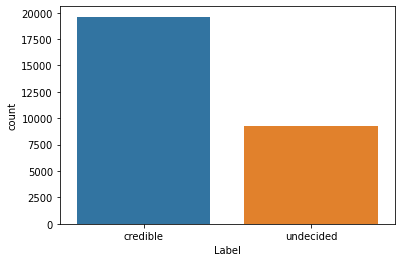

In [27]:
sns.countplot(x='Label', data=df)


**Text preprocessing :** includes: 

Removing Ponctuations / Stopwords.

Stemming and normalizing arabic texts.




In [28]:
## Preprocessing functions:
import pyarabic.araby as araby
import string,re
nltk.download('punkt')
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى"
,"أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم"
,"أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا"
,"إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق"
,"اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية"
,"الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما"
,"امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع"
,"بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك"
,"تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا"
,"حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك"
,"ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان"
,"سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما"
,"طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند"
,"عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما"
,"قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما"
,"كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم"
,"لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا"
,"لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما"
,"مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ"
,"ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء"
,"هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح"
,"وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\t', '', text)
    text = re.sub('\r', '', text)
    return text
  

ArListem = ArabicLightStemmer()
def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])
def remove_dirt_after_transformation(text):
    return re.sub('[a-z]|[A_Z]|[0-9]|\n|:|N|,*', '', text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Let's performe our fonctions on real texts just to see the reduction of words.

RQ: the stemming ,opposit to lemmitization, maintain the the root of the word. 

In [29]:
exemple1=df_source_1.text[0]
exemple1

'يخوض المنتخب الوطني المغربي لكرة القدم لأقل من 20 سنة، ما بين 24 و28 ماي الجاري تجمعا إعداديا مغلقا بمركب محمد السادس لكرة القدم بالمعمورة.\n\nوذكر بلاغ للجامعة الملكية المغربية لكرة القدم، أن هذا التجمع الاعدادي يدخل في إطار استعدادات النخبة الوطنية للمشاركة في البطولة العربية التي ستحتضنها مصر في الفترة المتراوحة ما بين 19 يونيو و3 يوليوز 2021.\n\nولهذا الغرض، وجه السيد فتحي جمال، المشرف العام على المنتخب الوطني الدعوة إلى 24 لاعبا ويتعلق الأمر بكل من :\n\n1- عبد الله بنتيك ......... أكاديمية محمد السادس\n\n2- اسماعيل لغزالي ..... أكاديمية محمد السادس\n\n3- أنس نناح ............... أكاديمية محمد السادس\n\n4- محمد أمين السهل .. أكاديمية محمد السادس\n\n5- حسن أكبوب ........... أكاديمية محمد السادس\n\n6- عمر صادق .............. أكاديمية محمد السادس\n\n7- عثمان شرايبي ........ أكاديمية محمد السادس\n\n8- محمد راديد ............. أكاديمية محمد السادس\n\n9- بدر أوهامي ............. النسمة السطاتية\n\n10- عبد اللطيف المتطوع .... شباب الصخور السوداء\n\n11- حسام بولاينين ........... الجيش الم

In [30]:
text_without_punctuation=remove_punct(exemple1)
text_without_punctuation

'يخوض المنتخب الوطني المغربي لكرة القدم لأقل من  سنة، ما بين  و ماي الجاري تجمعا إعداديا مغلقا بمركب محمد السادس لكرة القدم بالمعمورةوذكر بلاغ للجامعة الملكية المغربية لكرة القدم، أن هذا التجمع الاعدادي يدخل في إطار استعدادات النخبة الوطنية للمشاركة في البطولة العربية التي ستحتضنها مصر في الفترة المتراوحة ما بين  يونيو و يوليوز ولهذا الغرض، وجه السيد فتحي جمال، المشرف العام على المنتخب الوطني الدعوة إلى  لاعبا ويتعلق الأمر بكل من  عبد الله بنتيك  أكاديمية محمد السادس اسماعيل لغزالي  أكاديمية محمد السادس أنس نناح  أكاديمية محمد السادس محمد أمين السهل  أكاديمية محمد السادس حسن أكبوب  أكاديمية محمد السادس عمر صادق  أكاديمية محمد السادس عثمان شرايبي  أكاديمية محمد السادس محمد راديد  أكاديمية محمد السادس بدر أوهامي  النسمة السطاتية عبد اللطيف المتطوع  شباب الصخور السوداء حسام بولاينين  الجيش الملكي نوفل طاهيري  الجيش الملكي أشرف لعزيري  الفتح الرياضي مختار فريطس  الفتح الرياضي المهدي موهوب  الفتح الرياضي محمد كاسو  أولمبيك خريبكة أنس عزيز  أولمبيك الدشيرة حاتم السواح  الرجاء الرياضي عبد الل

In [31]:
text_sp=remove_stop_words(text_without_punctuation)
text_sp

'يخوض المنتخب الوطني المغربي لكرة القدم لأقل سنة، الجاري تجمعا إعداديا مغلقا بمركب محمد السادس لكرة القدم بالمعمورةوذكر بلاغ للجامعة الملكية المغربية لكرة القدم، التجمع الاعدادي يدخل إطار استعدادات النخبة الوطنية للمشاركة البطولة العربية ستحتضنها مصر الفترة المتراوحة يوليوز ولهذا الغرض، وجه السيد فتحي جمال، المشرف العام المنتخب الوطني الدعوة لاعبا ويتعلق الأمر بكل عبد الله بنتيك أكاديمية محمد السادس اسماعيل لغزالي أكاديمية محمد السادس أنس نناح أكاديمية محمد السادس محمد أمين السهل أكاديمية محمد السادس حسن أكبوب أكاديمية محمد السادس عمر صادق أكاديمية محمد السادس عثمان شرايبي أكاديمية محمد السادس محمد راديد أكاديمية محمد السادس بدر أوهامي النسمة السطاتية عبد اللطيف المتطوع شباب الصخور السوداء حسام بولاينين الجيش الملكي نوفل طاهيري الجيش الملكي أشرف لعزيري الفتح الرياضي مختار فريطس الفتح الرياضي المهدي موهوب الفتح الرياضي محمد كاسو أولمبيك خريبكة أنس عزيز أولمبيك الدشيرة حاتم السواح الرجاء الرياضي عبد الله أزرور الرجاء الرياضي حمزة ولد الحاج نهضة بركان محمد مجاهيد نهضة بركان حمزة بارودي نه

In [20]:
print(f"Length of text : {len(exemple1)}")
print(f"Length of text without ponctuation : {len(text_without_punctuation)}")
print(f"Length of text after removving stopwords: {len(text_sp)}")

Length of text : 1525
Length of text without ponctuation : 1145
Length of text after removving stopwords: 1055


In [32]:
stem(text_sp)

'خوض نخب وطن غرب كرر قدم أقل سن، جور جمع عدد غلق ركب حمد سدس كرر قدم عمرذكر بلغ جمع ملك غرب كرر قدم، جمع عدد دخل طور عدد نخب وطن شرك بطل عرب حضن مصر فتر ترح يلز هذا غرض، وجه لسد فحو جمل، شرف عوم نخب وطن دعو وعب علق مرر كل عبد لهه بنت كدم حمد سدس سمعل غزل كدم حمد سدس نسس نوح كدم حمد سدس حمد ءمن سهل كدم حمد سدس حسن كبب كدم حمد سدس عمر صدق كدم حمد سدس عثم شرب كدم حمد سدس حمد ردد كدم حمد سدس درر وهم نسم سطت عبد لطف طوع شبب صخر لسد حسم ولن جيش ملك نفل طهر جيش ملك شرف عزر فتح رضو خور رطس فتح رضو مهد وهب فتح رضو حمد كوس لمب خربك نسس عزز لمب دشر حتم لسح رجء رضو عبد لهه زرر رجء رضو حمز لدد لحج نهض برك حمد جهد نهض برك حمز برد نهض برك رون سدو حمد تحد ترك نسم زيب ودد فوس'

Step function convert every word in its original root (In english for exemple stem("let's go to the party")= let go to the parti.

Now let's apply this preprocessing function on our articles :

In [33]:
df['text'] = df['text'].apply(lambda x: remove_punct(x))
df['text'] = df['text'].apply(lambda x:normalizeArabic(x))
df['text'] = df['text'].apply(lambda x:remove_stop_words(x))
df['text'] = df['text'].apply(lambda x:stem(x))

In [34]:
df.text

0       خوض نخب وطن غرب كرر قدم وقل نه، جور جمع عدد غل...
1       روس عبد قدر عمره، زير جهز نقل لجس لمء جمع جلس ...
2       نجم رجنت ونل ميس فوز فرق رشل سبن سبق كوس محل ن...
3       لدبلمس غرب سبن، عبد خلق طرر، قبل سبن دعو برهم ...
4       شركت سنف فرنس عملق صنع ولد برطن ج س جبو منع قو...
                              ...                        
6839    علج نحلم عرف علج نحل رعع روع طبب بدل خدم نجو ن...
6840    صور فجر مدد صدر غدد فجر مدد لصدركد خلي علم من،...
6841    عتقل جمع تضق على علم على قرر قنو ولم لقم هنغ ك...
6842    ولح سجج على سعد فوح ورب لشفتش رتكب جرءم حرب يو...
6843    حذر مرك نتشر رهب كبر فرق سمو زرققءد ولق مرك فر...
Name: text, Length: 28871, dtype: object

Our data is prepared.

Every thing sounds great so far , let's implement our machine learning approach.
After splitting the data to evaluate our mdel's precision afterwards, i will use a pipeline having the Tfidvectorized vector and the model's name with it .

1.tf-idf = TF*IDF is a measure of the real importance of our word. TF: Term frequency = log (1+ (number of a word / total numbers of an article)) 
and IDF= log(Number of articles / proportion of articles that contain the term in all data).

2.The purpose of the pipeline is to assemble the vectorized vectors(originaly texst) to train our model.

In [48]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import f1_score
from sklearn.utils import shuffle


In [49]:
def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('clf', model),
    ])
    text_clf.fit(data, targets)
    return text_clf

Since we have a supervised ML model to train (like logistic regression), it's crucial to divide data into indepandant variables (observations or texsts) and their respective label y 

Before that how about we shuffle our data to make it a random distribution so the model can be well trained.

In [57]:
df = shuffle(df)
df

,title,text,Label,date
10773,لاتعلم شيء عن زوجها إيمى غانم تنشر صورة مؤثرة ...,علم شيء زوج يمي غنم نشر صور ءثر بوب غرف علج ول...,credible,2021-06-02
5746,أقراص للقضاء على كورونا .. الدواء الأمريكي الث...,تقع بحث مطر علج ثرو سبب نقذ عدد روح لسن لمقبله...,undecided,2021-06-18
2227,برونو فيرنانديز: رونالدو لن يحقق الفوز بمفرده ...,رون رنندز دفع رنلددفع نجم لبرتغل رون رنندز، عب...,undecided,2021-03-11
2405,وزيرة العدل تجري جولةً تفقديةً داخل مقر الوزارة,وجر زير عدل حكم لحد طنه، حلم برهم، ظهر لربعء، ...,credible,2021-04-08
1622,ذكرى وفاة نزار قباني...الرجل الذي راهن أن يجعل...,برل سنه توف شعر سرو عملق زور قبن عمر نهز شعر ر...,credible,2021-04-30
...,...,...,...,...
856,قرعة ربع نهائي دوري أبطال أوروبا تفرز مواجهات ...,فرز قرع ربع نهء دور بطل ورب التي جرء جمع مدد ن...,credible,2021-03-19
2997,موسيماني يبحث مع طبيب الأهلي موقف المصابين قبل...,سمن بحث طبب وهل وقف صبو وجه فتو لوب سبع عقد بت...,credible,2021-03-01
10324,كلب تاه في الغابات منذ زمن.. شاهد كيف أصبح شكل...,لبب توه لغب زمم شهد صبح شكل قصص شعر خلق؟ حوج ش...,credible,2021-06-18
1023,“ثابت” يدعو النواب إلى تحمّل مسؤولياتهم التاريخية,دعو عضض جلس نب، عبد طلب ثبت، زمل نب؛ ولي شور ج...,credible,2021-03-06


In [60]:
X = df.text.values
Y = df.Label.values

0 stands for credible and 1 stands for undecided

In [61]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
Y= label_encoder.fit_transform(df["Label"])
Y 

array([0, 1, 1, ..., 0, 0, 0])

In [62]:
X_train, X_test, Y_train, Y_test = tts(X,Y, test_size=0.2,shuffle=True, random_state=42)

Functions to evaluate the model.

In [64]:
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy
    
def get_F1(trained_model,X,y):
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

Machine learning algorithms used :   
1. Logisti regression : classfication model that seperate between data points .

2. Svm classifier : Maximize the marge distance (the distance between the separation boundary and the nearest samples).  

3. Random Forest :An ensemble of decision trees. It builds and combines multiple decision trees to get more accurate predictions. It's a non-linear classification algorithm .  They are called random because they choose predictors randomly at a time of training and forest because they take the output of multiple trees to make a decision.

4. Naive Bayes : a probabilistic machine learning model that's used for classification task. The crux of the classifier is based on the Bayes theorem.

In [67]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score as ac
lr_classifier = lr(penalty="l2",multi_class="multinomial") #  both L1 and L2 penalty terms are added: penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of 
#squares of the weights
lr_classifier=train_model(lr_classifier,X_train,Y_train)
Y_predicted_lr=lr_classifier.predict(X_test)
ac_lr=ac(Y_predicted_lr,Y_test)
print(ac_lr)

0.8848484848484849


In [70]:
from sklearn import svm 
svm_classifier=svm.SVC(kernel='linear',C=1)
svm_classifier=train_model(svm_classifier,X_train,Y_train)
Y_predict_svm=svm_classifier.predict(X_test)
ac_svm=ac(Y_predict_svm,Y_test)
print(ac_svm)

0.8961038961038961


In [71]:
from sklearn.ensemble import RandomForestClassifier as RF
RF_classifier = RF(max_depth=100, random_state=42)
RF_classifier=train_model(RF_classifier,X_train,Y_train)
Y_predict_RF=RF_classifier.predict(X_test)
ac_RF=ac(Y_predict_RF,Y_test)
print(ac(Y_predict_RF,Y_test))

0.824935064935065


In [72]:
from sklearn.naive_bayes import MultinomialNB as NB
Multinomial_NB_classifier = NB()
Multinomial_NB_classifier=train_model(Multinomial_NB_classifier,X_train,Y_train)
Y_predict_NB=Multinomial_NB_classifier.predict(X_test)
ac_NB=ac(Y_predict_NB,Y_test)
print(ac_NB)

0.72


In [73]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','RF','Naive Bayes'],
    'Score': [ac_lr,ac_svm,ac_RF,ac_NB]})
models.sort_values(by='Score', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Score
0,SVM,0.896104
1,Logistic Regression,0.884848
2,RF,0.824935
3,Naive Bayes,0.720000
